In [81]:
import matplotlib.pyplot as plt
import numpy as np

ROOM_DIMS = [5, 5]
MIC_COORDINATES = np.array([
    [0.5, 1.5],
    [4, 0.5],
    [4.5, 1],
    [2.5, 4.5]
])

SPEED_OF_SOUND = 343
SOURCE_COORDINATES = np.array(ROOM_DIMS)/2



[2.23606798 2.5        2.5        2.        ]


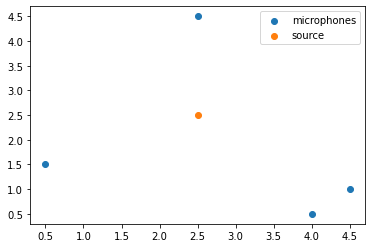

In [82]:
def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))

def plot_mics_and_source():
    plt.scatter(MIC_COORDINATES[:,0], MIC_COORDINATES[:, 1], label="microphones")
    plt.scatter(SOURCE_COORDINATES[0], SOURCE_COORDINATES[1], label="source")
    plt.legend()

def get_distances():
    return np.array([
        dist(SOURCE_COORDINATES, m)
        for m in MIC_COORDINATES
        ])

print(get_distances())
plot_mics_and_source()

The time delay between the two microphones defines a hyperbola:

$\tau_{i,j} = \frac{|m_i - s| - |m_j - s|}{c}$, where $c$ is the speed of sound

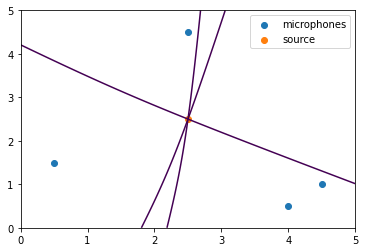

In [83]:
def plot_hyperbola(mic_1_coords, mic_2_coords, source_coords):
    x = np.linspace(0, ROOM_DIMS[0], 400)
    y = np.linspace(0, ROOM_DIMS[1], 400)
    x, y = np.meshgrid(x, y)

    delay = compute_theoretical_tdoa(mic_1_coords, mic_2_coords, source_coords)
    plt.contour(x, y, (
        np.sqrt((mic_1_coords[0] - x)**2 + (mic_1_coords[1] - y)**2) - np.sqrt((mic_2_coords[0] - x)**2 + (mic_2_coords[1] - y)**2)), [delay*SPEED_OF_SOUND]
                )
    
def compute_theoretical_tdoa(mic_1_coords, mic_2_coords, source_coords):
    return (dist(mic_1_coords, source_coords) - dist(mic_2_coords, source_coords))/SPEED_OF_SOUND

def plot_hyperbolas():
    n_mics = MIC_COORDINATES.shape[0]
    for i in range(1, n_mics):
        plot_hyperbola(MIC_COORDINATES[0], MIC_COORDINATES[i], SOURCE_COORDINATES)
        

plot_hyperbolas()
plot_mics_and_source()

In [ ]:
def compute_error(source_candidate, mic_1_coords, mic_2_coords, estimated_tdoa):
    n_mics = mic_coordinates.shape[0]
    
    theoretical_tdoa = compute_theoretical_tdoa(mic_1_coords, mic_2_coords, source_candidate)
    
    return (theoretical_tdoa - estimated_tdoa)**2

